1. Used logistic regression
2. Has null values
3. Has duplicates
4. Used KNN imputation to fill null values
5. Imbalaced dataset where rain tomorrow has higher

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/weatherAUS.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
df.shape

(145460, 23)

In [ ]:
df.dropna(subset=['RainToday', 'RainTomorrow'], inplace=True)

In [ ]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
px.histogram(df, x='Location', title='Location vs. Rainy Days', color='RainToday')

In [ ]:
px.histogram(df,
             x='Temp3pm',
             title='Temperature at 3 pm vs. Rain Tomorrow',
             color='RainTomorrow')

In [ ]:
px.histogram(df,
             x='RainTomorrow',
             color='RainToday',
             title='Rain Tomorrow vs. Rain Today')

In [ ]:
import plotly.express as px

# Assuming df is your DataFrame
fig = px.histogram(df, x='RainTomorrow', color='RainToday',
                   title='Comparison of Rain Tomorrow and Rain Today',
                   labels={'RainTomorrow': 'Rain Tomorrow', 'RainToday': 'Rain Today'},
                   category_orders={'RainTomorrow': ['No', 'Yes'], 'RainToday': ['No', 'Yes']},
                   barmode='group',  # Display bars in groups
                   width=800,
                   height=500,
                   template='plotly_white',
                   color_discrete_map={'No': 'steelblue', 'Yes': 'darkorange'})

fig.update_layout(
    xaxis_title='Rain Tomorrow',
    yaxis_title='Count',
    legend_title='Rain Today',
    margin=dict(l=50, r=50, t=50, b=50)  # Adjust the margins for better spacing
)

fig.show()


In [ ]:
px.scatter(df.sample(2000),
           title='Min Temp. vs Max Temp.',
           x='MinTemp',
           y='MaxTemp',
           color='RainToday')

In [ ]:
px.scatter(df.sample(2000),
           title='Temp (3 pm) vs. Humidity (3 pm)',
           x='Temp3pm',
           y='Humidity3pm',
           color='RainTomorrow')

In [ ]:
# train_val_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
# train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42)

In [ ]:
# print('train_df.shape :', train_df.shape)
# print('val_df.shape :', val_df.shape)
# print('test_df.shape :', test_df.shape)

In [ ]:
from sklearn.impute import KNNImputer

def KNNImpute(df):
    # Extract numerical columns for kNN imputation
    numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

    # Initialize KNNImputer
    imputer = KNNImputer(n_neighbors=3)

    # Perform kNN imputation on numeric columns
    df[numeric_columns] = imputer.fit_transform(df[numeric_columns])


    return df

# Apply the KNNImpute function to a copy of the DataFrame
df = KNNImpute(df.copy())

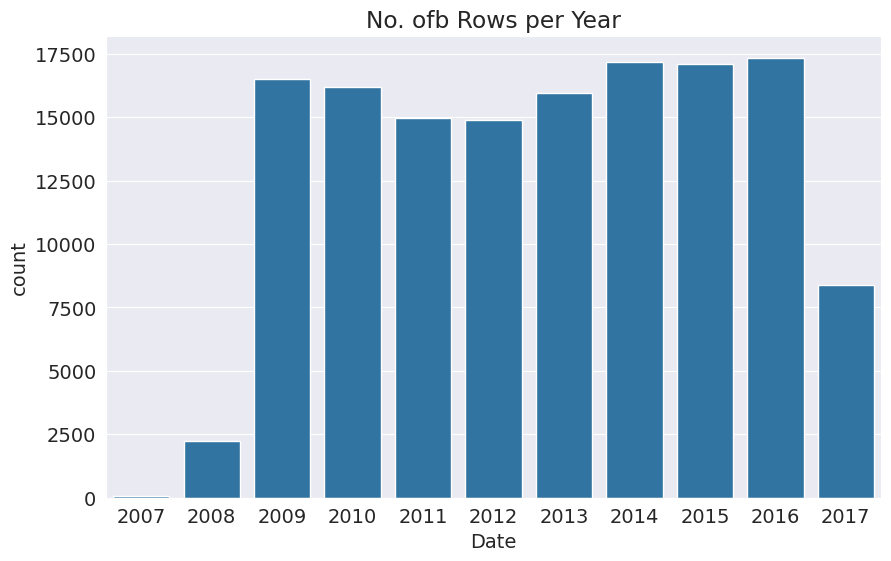

In [ ]:
plt.title('No. ofb Rows per Year')
sns.countplot(x=pd.to_datetime(df.Date).dt.year);

In [ ]:

df['Year'] = pd.to_datetime(df['Date']).dt.year

# Get a list of unique years
unique_years = df['Year'].unique()

# Split the unique_years into train, val, and test
train_years, rest_years = train_test_split(unique_years, test_size=0.2, random_state=42)
val_years, test_years = train_test_split(rest_years, test_size=0.25, random_state=42)

# Create train_df, val_df, and test_df based on the selected years
train_df = df[df['Year'].isin(train_years)].copy()
val_df = df[df['Year'].isin(val_years)].copy()
test_df = df[df['Year'].isin(test_years)].copy()

# Display the number of rows in each split
print('Original DataFrame Shape:', df.shape)
print('Train DataFrame Shape:', train_df.shape)
print('Validation DataFrame Shape:', val_df.shape)
print('Test DataFrame Shape:', test_df.shape)


Original DataFrame Shape: (140787, 24)
Train DataFrame Shape: (114254, 24)
Validation DataFrame Shape: (10598, 24)
Test DataFrame Shape: (15935, 24)


In [ ]:
# train_inputs = train_df[input_cols].copy()
# train_targets = train_df[target_col].copy()

In [ ]:
# val_inputs = val_df[input_cols].copy()
# val_targets = val_df[target_col].copy()

In [ ]:
# test_inputs = test_df[input_cols].copy()
# test_targets = test_df[target_col].copy()

In [ ]:
print('Train DataFrame Null Values:', train_df.isnull().sum())
print('Validation DataFrame Null Values:', val_df.isnull().sum())
print('Test DataFrame Null Values:', test_df.isnull().sum())

Train DataFrame Null Values: Date                0
Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine            0
WindGustDir      7472
WindGustSpeed       0
WindDir9am       7950
WindDir3pm       3082
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday           0
RainTomorrow        0
Year                0
dtype: int64
Validation DataFrame Null Values: Date               0
Location           0
MinTemp            0
MaxTemp            0
Rainfall           0
Evaporation        0
Sunshine           0
WindGustDir      894
WindGustSpeed      0
WindDir9am       658
WindDir3pm       389
WindSpeed9am       0
WindSpeed3pm       0
Humidity9am        0
Humidity3pm        0
Pressure9am        0
Pressure3pm        0
Cloud9am           0
Cloud3pm          

In [ ]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
categoric_cols = df.select_dtypes(include='object').columns

In [ ]:
##############Fair##########################

# def knn_impute_numerical(df, target_col, k=5):
#     # Copy the DataFrame to avoid modifying the original
#     imputed_df = df.copy()

#     # Identify numerical columns
#     numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

#     # Iterate over each row with missing values in the target column
#     for index, row in df[df[target_col].isnull()].iterrows():
#         # Calculate distances for numerical columns
#         distances = []
#         for _, other_row in df.dropna(subset=[target_col]).iterrows():
#             distance = np.linalg.norm(row[numerical_cols] - other_row[numerical_cols])
#             distances.append((other_row[target_col], distance))

#         # Sort distances and select the top k neighbors
#         distances.sort(key=lambda x: x[1])
#         neighbors = distances[:k]

#         # Impute missing value using the mean for numerical columns
#         imputed_value = np.mean([float(neighbor[0]) for neighbor in neighbors])
#         imputed_df.at[index, target_col] = imputed_value

#     return imputed_df
# imputed_df = knn_impute_numerical(df, target_col='RainTomorrow')

# def knn_impute_numerical(df, target_col, k=5):
#     # Copy the DataFrame to avoid modifying the original
#     imputed_df = df.copy()

#     # Identify numerical columns


#     # Check the data type of the target column
#     target_dtype = df[target_col].dtype

#     # Iterate over each row with missing values in the target column
#     for index, row in df[df[target_col].isnull()].iterrows():
#         # Calculate distances
#         distances = []
#         for _, other_row in df.dropna(subset=[target_col]).iterrows():
#             distance = np.linalg.norm(row[numeric_cols] - other_row[numeric_cols])
#             distances.append((other_row[target_col], distance))

#         # Sort distances and select the top k neighbors
#         distances.sort(key=lambda x: x[1])
#         neighbors = distances[:k]

#         # Impute missing value
#         if target_dtype == 'float64' or target_dtype == 'int64':
#             imputed_value = np.mean([float(neighbor[0]) for neighbor in neighbors])
#         else:
#             imputed_value = pd.Series([neighbor[0] for neighbor in neighbors]).mode().values[0]

#         imputed_df.at[index, target_col] = imputed_value

#     return imputed_df
# df = knn_impute_numerical(df, target_col= 'RainTomorrow', k=5)

In [ ]:
import pandas as pd

def remove_nulls_with_mode(df, cat_cols):
    df_no_nulls = df.copy()

    # Iterate through each categorical column
    for col in cat_cols:
        # Find the mode for the column
        mode_value = df[col].mode().values[0]

        # Replace missing values with the mode
        df_no_nulls[col].fillna(mode_value, inplace=True)

    return df_no_nulls

cat_cols = ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
df = remove_nulls_with_mode(df, cat_cols)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140787 entries, 0 to 145458
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           140787 non-null  object 
 1   Location       140787 non-null  object 
 2   MinTemp        140787 non-null  float64
 3   MaxTemp        140787 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    140787 non-null  float64
 6   Sunshine       140787 non-null  float64
 7   WindGustDir    140787 non-null  object 
 8   WindGustSpeed  140787 non-null  float64
 9   WindDir9am     140787 non-null  object 
 10  WindDir3pm     140787 non-null  object 
 11  WindSpeed9am   140787 non-null  float64
 12  WindSpeed3pm   140787 non-null  float64
 13  Humidity9am    140787 non-null  float64
 14  Humidity3pm    140787 non-null  float64
 15  Pressure9am    140787 non-null  float64
 16  Pressure3pm    140787 non-null  float64
 17  Cloud9am       140787 non-nul

In [ ]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Year             0
dtype: int64

In [ ]:
# train_inputs[numeric_columns] = imputer.transform(train_inputs[numeric_columns])
# val_inputs[numeric_columns] = imputer.transform(val_inputs[numeric_columns])
# test_inputs[numeric_columns] = imputer.transform(test_inputs[numeric_columns])

In [ ]:
# Display the number of null values after categorical imputation
print('Train DataFrame Null Values:', train_df.isnull().sum().sum())
print('Validation DataFrame Null Values:', val_df.isnull().sum().sum())
print('Test DataFrame Null Values:', test_df.isnull().sum().sum())

Train DataFrame Null Values: 18504
Validation DataFrame Null Values: 1941
Test DataFrame Null Values: 2048


In [ ]:
train_df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
31      2009-01-01   Albury     11.3     26.5       0.0     7.600000   
32      2009-01-02   Albury      9.6     23.9       0.0     3.933333   
33      2009-01-03   Albury     10.5     28.8       0.0     9.066667   
34      2009-01-04   Albury     12.3     34.6       0.0     3.933333   
35      2009-01-05   Albury     12.9     35.8       0.0     6.800000   
...            ...      ...      ...      ...       ...          ...   
145279  2016-12-27    Uluru     22.1     35.8      63.8     6.400000   
145280  2016-12-28    Uluru     22.6     36.8       0.0     9.133333   
145281  2016-12-29    Uluru     23.2     38.0       0.0    11.666667   
145282  2016-12-30    Uluru     19.7     37.0       0.0     9.533333   
145283  2016-12-31    Uluru     23.7     33.0       0.0     8.333333   

         Sunshine WindGustDir  WindGustSpeed WindDir9am WindDir3pm  \
31      10.033333         WNW           56.0          W        WNW   
32      10.033333           W           41.0        WSW        SSW   
33      10.033333         SSE           26.0        SSE          E   
34       8.900000         WNW           37.0        SSE         NW   
35      10.033333         WNW           41.0        ENE         NW   
...           ...         ...            ...        ...        ...   
145279   8.033333         WNW           43.0        WNW          W   
145280  10.033333          NW           50.0         NW          W   
145281  10.033333         SSW           33.0          S        WSW   
145282  10.033333           E           37.0        ESE          W   
145283  10.033333          NE           46.0         NE        ENE   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
31              19.0          31.0         46.0         26.0       1004.5   
32              19.0          11.0         44.0         22.0       1014.4   
33              11.0           7.0         43.0         22.0       1018.7   
34               6.0          17.0         41.0         12.0       1015.1   
35               6.0          26.0         41.0          9.0       1012.6   
...              ...           ...          ...          ...          ...   
145279          17.0          31.0         77.0         41.0        997.8   
145280          30.0          15.0         63.0         39.0       1000.0   
145281          17.0          17.0         25.0         14.0       1004.4   
145282          22.0           6.0         30.0         23.0       1004.6   
145283          24.0          17.0         40.0         38.0       1005.1   

        Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm RainToday  \
31           1003.2  2.333333  5.333333     19.7     25.7        No   
32           1013.1  0.666667  1.333333     14.9     22.1        No   
33           1014.8  1.666667  2.333333     17.1     26.5        No   
34           1010.3  1.000000  1.000000     20.7     33.9        No   
35           1009.2  2.666667  0.666667     22.4     34.4        No   
...             ...       ...       ...      ...      ...       ...   
145279        995.2  4.000000  2.000000     26.0     33.5       Yes   
145280        998.8  4.666667  3.000000     29.7     34.0        No   
145281       1001.0  3.333333  3.666667     28.7     36.4        No   
145282       1000.9  2.333333  3.333333     28.2     35.1        No   
145283       1002.7  5.000000  3.000000     30.1     31.5        No   

       RainTomorrow  Year  
31               No  2009  
32               No  2009  
33               No  2009  
34               No  2009  
35               No  2009  
...             ...   ...  
145279           No  2016  
145280           No  2016  
145281           No  2016  
145282           No  2016  
145283           No  2016  

[114254 rows x 24 columns]

In [ ]:
val_df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6     3.733333   
1       2008-12-02   Albury      7.4     25.1       0.0     6.733333   
2       2008-12-03   Albury     12.9     25.7       0.0     5.400000   
3       2008-12-04   Albury      9.2     28.0       0.0     9.066667   
4       2008-12-05   Albury     17.5     32.3       1.0     4.400000   
...            ...      ...      ...      ...       ...          ...   
145454  2017-06-20    Uluru      3.5     21.8       0.0     5.533333   
145455  2017-06-21    Uluru      2.8     23.4       0.0     4.400000   
145456  2017-06-22    Uluru      3.6     25.3       0.0     7.066667   
145457  2017-06-23    Uluru      5.4     26.9       0.0     5.933333   
145458  2017-06-24    Uluru      7.8     27.0       0.0     6.200000   

         Sunshine WindGustDir  WindGustSpeed WindDir9am WindDir3pm  \
0       10.033333           W           44.0          W        WNW   
1       10.033333         WNW           44.0        NNW        WSW   
2       10.033333         WSW           46.0          W        WSW   
3       10.033333          NE           24.0         SE          E   
4       10.033333           W           41.0        ENE         NW   
...           ...         ...            ...        ...        ...   
145454  10.033333           E           31.0        ESE          E   
145455  10.033333           E           31.0         SE        ENE   
145456  10.033333         NNW           22.0         SE          N   
145457  10.033333           N           37.0         SE        WNW   
145458  10.033333          SE           28.0        SSE          N   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0               20.0          24.0         71.0         22.0       1007.7   
1                4.0          22.0         44.0         25.0       1010.6   
2               19.0          26.0         38.0         30.0       1007.6   
3               11.0           9.0         45.0         16.0       1017.6   
4                7.0          20.0         82.0         33.0       1010.8   
...              ...           ...          ...          ...          ...   
145454          15.0          13.0         59.0         27.0       1024.7   
145455          13.0          11.0         51.0         24.0       1024.6   
145456          13.0           9.0         56.0         21.0       1023.5   
145457           9.0           9.0         53.0         24.0       1021.0   
145458          13.0           7.0         51.0         24.0       1019.4   

        Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm RainToday  \
0            1007.1  8.000000  4.333333     16.9     21.8        No   
1            1007.8  0.666667  0.666667     17.2     24.3        No   
2            1008.7  0.333333  2.000000     21.0     23.2        No   
3            1012.8  2.333333  2.666667     18.1     26.5        No   
4            1006.0  7.000000  8.000000     17.8     29.7        No   
...             ...       ...       ...      ...      ...       ...   
145454       1021.2  0.333333  0.333333      9.4     20.9        No   
145455       1020.3  2.000000  2.333333     10.1     22.4        No   
145456       1019.1  1.000000  1.000000     10.9     24.5        No   
145457       1016.8  2.333333  2.666667     12.5     26.1        No   
145458       1016.5  3.000000  2.000000     15.1     26.0        No   

       RainTomorrow  Year  
0                No  2008  
1                No  2008  
2                No  2008  
3                No  2008  
4                No  2008  
...             ...   ...  
145454           No  2017  
145455           No  2017  
145456           No  2017  
145457           No  2017  
145458           No  2017  

[10598 rows x 24 columns]

In [ ]:
test_df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
1431    2013-01-01   Albury     12.1     34.5       0.0     6.533333   
1432    2013-01-02   Albury     13.8     33.6       0.0     6.533333   
1433    2013-01-03   Albury     15.8     36.9       0.0     5.266667   
1434    2013-01-04   Albury     18.6     40.7       0.0     9.133333   
1435    2013-01-05   Albury     19.8     43.4       0.0     8.266667   
...            ...      ...      ...      ...       ...          ...   
144183  2013-12-27    Uluru     19.5     40.5       0.0     9.600000   
144184  2013-12-28    Uluru     19.5     43.8       0.0    10.066667   
144185  2013-12-29    Uluru     24.5     43.1       0.0    11.066667   
144186  2013-12-30    Uluru     23.8     43.1       0.0    10.333333   
144187  2013-12-31    Uluru     22.1     43.0       0.0    10.500000   

         Sunshine WindGustDir  WindGustSpeed WindDir9am WindDir3pm  \
1431    10.033333           W           44.0         SE          W   
1432    10.033333         SSE           28.0        SSW        ESE   
1433    10.033333           E           22.0          S        SSW   
1434    10.033333         ENE           44.0        ESE          N   
1435    10.033333          NW           81.0          S        ESE   
...           ...         ...            ...        ...        ...   
144183  10.033333          NE           35.0        NNW        ESE   
144184  10.033333         SSE           43.0        NNW         SE   
144185  10.033333          NE           46.0          E        NNE   
144186  10.033333         NNW           69.0          N         NW   
144187  10.033333           W           56.0          W          N   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
1431             4.0          22.0         49.0         16.0       1012.8   
1432             9.0          11.0         48.0         17.0       1012.2   
1433             7.0          11.0         32.0         20.0       1015.8   
1434             7.0          24.0         44.0         12.0       1012.3   
1435             7.0          11.0         36.0         17.0       1012.4   
...              ...           ...          ...          ...          ...   
144183          15.0          24.0         28.0         12.0       1009.9   
144184          11.0           9.0         13.0          8.0       1008.4   
144185          33.0          24.0         21.0          8.0       1010.4   
144186          11.0          37.0         35.0         17.0       1010.3   
144187           9.0          17.0         29.0         14.0       1010.1   

        Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm RainToday  \
1431         1009.3  1.333333  2.333333     22.3     32.7        No   
1432         1010.9  2.666667  0.666667     21.4     31.2        No   
1433         1011.9  4.333333  4.000000     23.6     33.9        No   
1434         1008.1  1.666667  2.000000     27.8     39.3        No   
1435         1009.8  0.666667  1.000000     30.7     42.4        No   
...             ...       ...       ...      ...      ...       ...   
144183       1005.0  0.333333  1.000000     30.9     39.3        No   
144184       1004.7  0.666667  4.666667     34.3     41.5        No   
144185       1006.2  2.666667  2.333333     31.6     41.1        No   
144186       1007.0  4.333333  3.000000     32.0     38.6        No   
144187       1006.3  3.333333  4.333333     34.1     40.9        No   

       RainTomorrow  Year  
1431             No  2013  
1432             No  2013  
1433             No  2013  
1434             No  2013  
1435            Yes  2013  
...             ...   ...  
144183           No  2013  
144184           No  2013  
144185           No  2013  
144186           No  2013  
144187           No  2013  

[15935 rows x 24 columns]

In [ ]:
# import numpy as np
# import pandas as pd

# def knn_impute(df, target_column, k=5):
#     # Copy the DataFrame to avoid modifying the original
#     imputed_df = df.copy()

#     # Identify numerical columns
#     numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

#     # Identify categorical columns
#     categorical_cols = df.select_dtypes(include='object').columns

#     # Iterate over each row with missing values
#     for index, row in df[df[target_column].isnull()].iterrows():
#         if target_column in numerical_cols:
#             # Calculate distances for numerical columns
#             distances = []
#             for _, other_row in df.dropna(subset=[target_column]).iterrows():
#                 distance = np.linalg.norm(row[numerical_cols] - other_row[numerical_cols])
#                 distances.append((other_row[target_column], distance))
#         elif target_column in categorical_cols:
#             # Calculate distances for categorical columns (using Jaccard distance)
#             distances = []
#             for _, other_row in df.dropna(subset=[target_column]).iterrows():
#                 distance = 1 - len(set(row[categorical_cols]) & set(other_row[categorical_cols])) / len(set(row[categorical_cols]) | set(other_row[categorical_cols]))
#                 distances.append((other_row[target_column], distance))

#         # Sort distances and select the top k neighbors
#         distances.sort(key=lambda x: x[1])
#         neighbors = distances[:k]

#         # Impute missing value using the mode for categorical columns or mean for numerical columns
#         if target_column in numerical_cols:
#             imputed_value = np.mean([float(neighbor[0]) for neighbor in neighbors])
#         elif target_column in categorical_cols:
#             imputed_value = pd.Series([neighbor[0] for neighbor in neighbors]).mode().values[0]

#         imputed_df.at[index, target_column] = imputed_value

#     return imputed_df

# # Assume df is your DataFrame
# # Replace 'RainTomorrow' with the target column you want to impute
# imputed_df = knn_impute(df, target_column='RainTomorrow')

# # Display the imputed DataFrame
# print(imputed_df['RainTomorrow'].isnull().sum())


<ipython-input-533-b52ef202b5d3>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



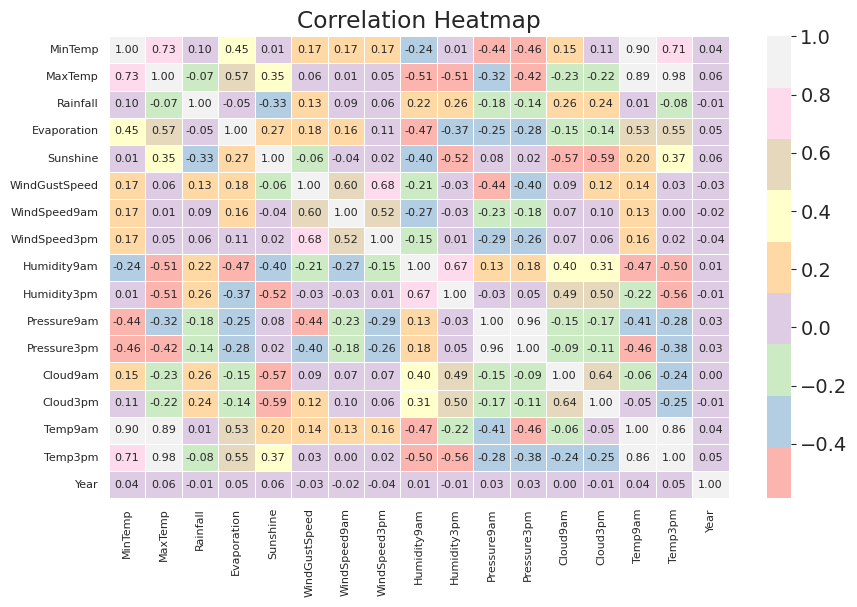

In [ ]:
correlation_matrix = df.corr()

annot_kws = {"size": 8}

sns.heatmap(correlation_matrix, annot=True, cmap='Pastel1', fmt=".2f", linewidths=0.5, annot_kws=annot_kws)


# Reduce the size of x-axis and y-axis tick labels
plt.xticks(size=8)
plt.yticks(size=8)

# Display the plot
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
input_cols = list(train_df.columns)[1:-1]
target_col = 'RainTomorrow'

In [ ]:
print(input_cols)

['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow']


In [ ]:
target_col

'RainTomorrow'

In [ ]:
train_df[numeric_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
dtype: int64

In [ ]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [ ]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

In [ ]:
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

In [ ]:
train_inputs

Location  MinTemp  MaxTemp  Rainfall  Evaporation   Sunshine  \
31       Albury     11.3     26.5       0.0     7.600000  10.033333   
32       Albury      9.6     23.9       0.0     3.933333  10.033333   
33       Albury     10.5     28.8       0.0     9.066667  10.033333   
34       Albury     12.3     34.6       0.0     3.933333   8.900000   
35       Albury     12.9     35.8       0.0     6.800000  10.033333   
...         ...      ...      ...       ...          ...        ...   
145279    Uluru     22.1     35.8      63.8     6.400000   8.033333   
145280    Uluru     22.6     36.8       0.0     9.133333  10.033333   
145281    Uluru     23.2     38.0       0.0    11.666667  10.033333   
145282    Uluru     19.7     37.0       0.0     9.533333  10.033333   
145283    Uluru     23.7     33.0       0.0     8.333333  10.033333   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
31             WNW           56.0          W        WNW          19.0   
32               W           41.0        WSW        SSW          19.0   
33             SSE           26.0        SSE          E          11.0   
34             WNW           37.0        SSE         NW           6.0   
35             WNW           41.0        ENE         NW           6.0   
...            ...            ...        ...        ...           ...   
145279         WNW           43.0        WNW          W          17.0   
145280          NW           50.0         NW          W          30.0   
145281         SSW           33.0          S        WSW          17.0   
145282           E           37.0        ESE          W          22.0   
145283          NE           46.0         NE        ENE          24.0   

        WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
31              31.0         46.0         26.0       1004.5       1003.2   
32              11.0         44.0         22.0       1014.4       1013.1   
33               7.0         43.0         22.0       1018.7       1014.8   
34              17.0         41.0         12.0       1015.1       1010.3   
35              26.0         41.0          9.0       1012.6       1009.2   
...              ...          ...          ...          ...          ...   
145279          31.0         77.0         41.0        997.8        995.2   
145280          15.0         63.0         39.0       1000.0        998.8   
145281          17.0         25.0         14.0       1004.4       1001.0   
145282           6.0         30.0         23.0       1004.6       1000.9   
145283          17.0         40.0         38.0       1005.1       1002.7   

        Cloud9am  Cloud3pm  Temp9am  Temp3pm RainToday RainTomorrow  
31      2.333333  5.333333     19.7     25.7        No           No  
32      0.666667  1.333333     14.9     22.1        No           No  
33      1.666667  2.333333     17.1     26.5        No           No  
34      1.000000  1.000000     20.7     33.9        No           No  
35      2.666667  0.666667     22.4     34.4        No           No  
...          ...       ...      ...      ...       ...          ...  
145279  4.000000  2.000000     26.0     33.5       Yes           No  
145280  4.666667  3.000000     29.7     34.0        No           No  
145281  3.333333  3.666667     28.7     36.4        No           No  
145282  2.333333  3.333333     28.2     35.1        No           No  
145283  5.000000  3.000000     30.1     31.5        No           No  

[114254 rows x 22 columns]

In [ ]:
train_targets

31        No
32        No
33        No
34        No
35        No
          ..
145279    No
145280    No
145281    No
145282    No
145283    No
Name: RainTomorrow, Length: 114254, dtype: object

In [ ]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

In [ ]:
train_inputs[numeric_cols].describe()

MinTemp        MaxTemp       Rainfall    Evaporation  \
count  114254.000000  114254.000000  114254.000000  114254.000000   
mean       12.108087      23.099303       2.353676       5.266782   
std         6.394324       7.101182       8.480975       3.573960   
min        -8.500000      -4.800000       0.000000       0.000000   
25%         7.500000      17.800000       0.000000       3.000000   
50%        11.900000      22.500000       0.000000       4.666667   
75%        16.800000      28.100000       0.800000       6.800000   
max        33.900000      48.100000     371.000000     145.000000   

            Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  114254.000000  114254.000000  114254.000000  114254.000000   
mean        8.134887      39.898737      14.027535      18.595474   
std         3.240424      13.325033       8.886801       8.771702   
min         0.000000       7.000000       0.000000       0.000000   
25%         6.500000      31.000000       7.000000      13.000000   
50%         9.700000      39.000000      13.000000      19.000000   
75%        10.033333      47.666667      19.000000      24.000000   
max        14.500000     135.000000      87.000000      87.000000   

         Humidity9am    Humidity3pm    Pressure9am    Pressure3pm  \
count  114254.000000  114254.000000  114254.000000  114254.000000   
mean       68.945043      51.733506    1017.890024    1015.562417   
std        18.916508      20.609342       6.873733       6.822870   
min         1.000000       0.000000     980.500000     977.100000   
25%        57.000000      37.000000    1013.500000    1011.000000   
50%        70.000000      52.000000    1017.966667    1015.700000   
75%        83.000000      66.000000    1022.400000    1020.000000   
max       100.000000     100.000000    1041.000000    1039.600000   

            Cloud9am       Cloud3pm        Temp9am        Temp3pm  
count  114254.000000  114254.000000  114254.000000  114254.000000  
mean        3.897299       3.988298      16.888143      21.594573  
std         2.715361       2.533147       6.492928       6.904590  
min         0.000000       0.000000      -7.200000      -5.400000  
25%         1.000000       1.666667      12.200000      16.500000  
50%         3.333333       3.666667      16.600000      21.100000  
75%         7.000000       6.666667      21.500000      26.300000  
max         9.000000       9.000000      40.200000      46.100000

In [ ]:
train_inputs[categorical_cols].nunique()

Location        49
WindGustDir     16
WindDir9am      16
WindDir3pm      16
RainToday        2
RainTomorrow     2
dtype: int64

In [ ]:
train_inputs[numeric_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

In [ ]:
df[numeric_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

In [ ]:
train_inputs[numeric_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

In [ ]:
# imputer.fit(df[numeric_cols])

In [ ]:
# list(imputer.statistics_)

In [ ]:
# train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
# val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
# test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

In [ ]:
train_inputs[numeric_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

In [ ]:
df[numeric_cols].describe()

MinTemp        MaxTemp       Rainfall    Evaporation  \
count  140787.000000  140787.000000  140787.000000  140787.000000   
mean       12.183577      23.234514       2.349974       5.292641   
std         6.395854       7.109116       8.465173       3.570919   
min        -8.500000      -4.800000       0.000000       0.000000   
25%         7.600000      17.900000       0.000000       3.066667   
50%        12.000000      22.600000       0.000000       4.733333   
75%        16.800000      28.200000       0.800000       6.800000   
max        33.900000      48.100000     371.000000     145.000000   

            Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  140787.000000  140787.000000  140787.000000  140787.000000   
mean        8.168762      39.845457      13.984471      18.556604   
std         3.219227      13.346430       8.869294       8.773064   
min         0.000000       6.000000       0.000000       0.000000   
25%         6.600000      31.000000       7.000000      13.000000   
50%         9.800000      39.000000      13.000000      18.000000   
75%        10.033333      47.666667      19.000000      24.000000   
max        14.500000     135.000000     130.000000      87.000000   

         Humidity9am    Humidity3pm    Pressure9am    Pressure3pm  \
count  140787.000000  140787.000000  140787.000000  140787.000000   
mean       68.868428      51.541354    1017.820935    1015.485981   
std        19.032812      20.694600       6.891262       6.839190   
min         0.000000       0.000000     980.500000     977.100000   
25%        57.000000      37.000000    1013.400000    1010.900000   
50%        70.000000      52.000000    1017.933333    1015.600000   
75%        83.000000      65.166667    1022.366667    1020.000000   
max       100.000000     100.000000    1041.000000    1039.600000   

            Cloud9am       Cloud3pm        Temp9am        Temp3pm  
count  140787.000000  140787.000000  140787.000000  140787.000000  
mean        3.875718       3.959568      16.971438      21.721861  
std         2.713028       2.530620       6.498974       6.916192  
min         0.000000       0.000000      -7.200000      -5.400000  
25%         1.000000       1.666667      12.300000      16.700000  
50%         3.333333       3.333333      16.700000      21.200000  
75%         7.000000       6.333333      21.500000      26.400000  
max         9.000000       9.000000      40.200000      46.700000

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit(df[numeric_cols])

MinMaxScaler()

In [ ]:
print('Minimum:')
list(scaler.data_min_)

Minimum:


[-8.5,
 -4.8,
 0.0,
 0.0,
 0.0,
 6.0,
 0.0,
 0.0,
 0.0,
 0.0,
 980.5,
 977.1,
 0.0,
 0.0,
 -7.2,
 -5.4]

In [ ]:
print('Maximum:')
list(scaler.data_max_)

Maximum:


[33.9,
 48.1,
 371.0,
 145.0,
 14.5,
 135.0,
 130.0,
 87.0,
 100.0,
 100.0,
 1041.0,
 1039.6,
 9.0,
 9.0,
 40.2,
 46.7]

In [ ]:
df.head(5)

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation   Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6     3.733333  10.033333   
1  2008-12-02   Albury      7.4     25.1       0.0     6.733333  10.033333   
2  2008-12-03   Albury     12.9     25.7       0.0     5.400000  10.033333   
3  2008-12-04   Albury      9.2     28.0       0.0     9.066667  10.033333   
4  2008-12-05   Albury     17.5     32.3       1.0     4.400000  10.033333   

  WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
0           W           44.0          W        WNW          20.0   
1         WNW           44.0        NNW        WSW           4.0   
2         WSW           46.0          W        WSW          19.0   
3          NE           24.0         SE          E          11.0   
4           W           41.0        ENE         NW           7.0   

   WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0          24.0         71.0         22.0       1007.7       1007.1  8.000000   
1          22.0         44.0         25.0       1010.6       1007.8  0.666667   
2          26.0         38.0         30.0       1007.6       1008.7  0.333333   
3           9.0         45.0         16.0       1017.6       1012.8  2.333333   
4          20.0         82.0         33.0       1010.8       1006.0  7.000000   

   Cloud3pm  Temp9am  Temp3pm RainToday RainTomorrow  Year  
0  4.333333     16.9     21.8        No           No  2008  
1  0.666667     17.2     24.3        No           No  2008  
2  2.000000     21.0     23.2        No           No  2008  
3  2.666667     18.1     26.5        No           No  2008  
4  8.000000     17.8     29.7        No           No  2008

In [ ]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [ ]:
train_inputs[numeric_cols].describe()

MinTemp        MaxTemp       Rainfall    Evaporation  \
count  114254.000000  114254.000000  114254.000000  114254.000000   
mean        0.486040       0.527397       0.006344       0.036323   
std         0.150810       0.134238       0.022860       0.024648   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.377358       0.427221       0.000000       0.020690   
50%         0.481132       0.516068       0.000000       0.032184   
75%         0.596698       0.621928       0.002156       0.046897   
max         1.000000       1.000000       1.000000       1.000000   

            Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  114254.000000  114254.000000  114254.000000  114254.000000   
mean        0.561027       0.262781       0.107904       0.213741   
std         0.223477       0.103295       0.068360       0.100824   
min         0.000000       0.007752       0.000000       0.000000   
25%         0.448276       0.193798       0.053846       0.149425   
50%         0.668966       0.255814       0.100000       0.218391   
75%         0.691954       0.322997       0.146154       0.275862   
max         1.000000       1.000000       0.669231       1.000000   

         Humidity9am    Humidity3pm    Pressure9am    Pressure3pm  \
count  114254.000000  114254.000000  114254.000000  114254.000000   
mean        0.689450       0.517335       0.618017       0.615399   
std         0.189165       0.206093       0.113615       0.109166   
min         0.010000       0.000000       0.000000       0.000000   
25%         0.570000       0.370000       0.545455       0.542400   
50%         0.700000       0.520000       0.619284       0.617600   
75%         0.830000       0.660000       0.692562       0.686400   
max         1.000000       1.000000       1.000000       1.000000   

            Cloud9am       Cloud3pm        Temp9am        Temp3pm  
count  114254.000000  114254.000000  114254.000000  114254.000000  
mean        0.433033       0.443144       0.508189       0.518130  
std         0.301707       0.281461       0.136982       0.132526  
min         0.000000       0.000000       0.000000       0.000000  
25%         0.111111       0.185185       0.409283       0.420345  
50%         0.370370       0.407407       0.502110       0.508637  
75%         0.777778       0.740741       0.605485       0.608445  
max         1.000000       1.000000       1.000000       0.988484

In [ ]:
df[categorical_cols].nunique()

Location        49
WindGustDir     16
WindDir9am      16
WindDir3pm      16
RainToday        2
RainTomorrow     2
dtype: int64

In [ ]:
# import pandas as pd

# def custom_one_hot_encoder(data, categorical_cols):
#     # Exclude non-existent columns from categorical_cols
#     valid_categorical_cols = [col for col in categorical_cols if col in data.columns]

#     # Apply one-hot encoding only to valid categorical columns
#     encoded_data = pd.get_dummies(data, columns=valid_categorical_cols, drop_first=True)

#     return encoded_data

# # Assuming you have a DataFrame df and a list of categorical columns categorical_cols
# # Modify the code below according to your DataFrame and column names
# train_inputs_encoded = custom_one_hot_encoder(train_inputs, categorical_cols)
# val_inputs_encoded = custom_one_hot_encoder(val_inputs, categorical_cols)
# test_inputs_encoded = custom_one_hot_encoder(test_inputs, categorical_cols)


In [ ]:
# from sklearn.preprocessing import OneHotEncoder

# # Assuming df is your DataFrame
# categorical_cols = df.select_dtypes(include='object').columns

# # Define and fit the encoder
# encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
# encoder.fit(df[categorical_cols])


In [ ]:
# encoder.fit(df[categorical_cols])

In [ ]:
# encoder.categories_

In [ ]:
import pandas as pd

def custom_one_hot_encoder(data, categorical_cols):
    # Create an empty DataFrame to store the encoded data
    encoded_data = pd.DataFrame(index=data.index)

    # List to store the names of encoded columns
    encoded_cols = []

    # Iterate over each categorical column
    for col in categorical_cols:
        # Skip 'Date' column
        if col == 'Date':
            continue

        # Use get_dummies to one-hot encode the current column
        one_hot_encoded = pd.get_dummies(data[col], prefix=col, drop_first=True)

        # Concatenate the one-hot encoded columns to the result DataFrame
        encoded_data = pd.concat([encoded_data, one_hot_encoded], axis=1)

        # Store the names of the encoded columns
        encoded_cols.extend(one_hot_encoded.columns)

    return encoded_data, encoded_cols

train_inputs_encoded, encoded_cols = custom_one_hot_encoder(train_inputs, categorical_cols)
val_inputs_encoded, _ = custom_one_hot_encoder(val_inputs, categorical_cols)
test_inputs_encoded, _ = custom_one_hot_encoder(test_inputs, categorical_cols)

# Display the names of the encoded columns
print(encoded_cols)


['Location_Albany', 'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine', 'Location_Launceston', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree', 'Location_MountGambier', 'Location_MountGinini', 'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF', 'Location_Penrith', 'Location_Perth', 'Location_PerthAirport', 'Location_Portland', 'Location_Richmond', 'Location_Sale', 'Location_SalmonGums', 'Location_Sydney', 'Location_SydneyAirport', 'Location_Townsville', 'Location_Tuggeranong', 'Location_Uluru', 'Location_WaggaWagga', 'Location_Walpole', 'Location_Watsonia', 'Location_Williamtown', 'Location_Witchcliffe', 'L

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
test_inputs

Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
1431     Albury  0.485849  0.742911       0.0     0.045057  0.691954   
1432     Albury  0.525943  0.725898       0.0     0.045057  0.691954   
1433     Albury  0.573113  0.788280       0.0     0.036322  0.691954   
1434     Albury  0.639151  0.860113       0.0     0.062989  0.691954   
1435     Albury  0.667453  0.911153       0.0     0.057011  0.691954   
...         ...       ...       ...       ...          ...       ...   
144183    Uluru  0.660377  0.856333       0.0     0.066207  0.691954   
144184    Uluru  0.660377  0.918715       0.0     0.069425  0.691954   
144185    Uluru  0.778302  0.905482       0.0     0.076322  0.691954   
144186    Uluru  0.761792  0.905482       0.0     0.071264  0.691954   
144187    Uluru  0.721698  0.903592       0.0     0.072414  0.691954   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
1431             W       0.294574         SE          W      0.030769   
1432           SSE       0.170543        SSW        ESE      0.069231   
1433             E       0.124031          S        SSW      0.053846   
1434           ENE       0.294574        ESE          N      0.053846   
1435            NW       0.581395          S        ESE      0.053846   
...            ...            ...        ...        ...           ...   
144183          NE       0.224806        NNW        ESE      0.115385   
144184         SSE       0.286822        NNW         SE      0.084615   
144185          NE       0.310078          E        NNE      0.253846   
144186         NNW       0.488372          N         NW      0.084615   
144187           W       0.387597          W          N      0.069231   

        WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
1431        0.252874         0.49         0.16     0.533884       0.5152   
1432        0.126437         0.48         0.17     0.523967       0.5408   
1433        0.126437         0.32         0.20     0.583471       0.5568   
1434        0.275862         0.44         0.12     0.525620       0.4960   
1435        0.126437         0.36         0.17     0.527273       0.5232   
...              ...          ...          ...          ...          ...   
144183      0.275862         0.28         0.12     0.485950       0.4464   
144184      0.103448         0.13         0.08     0.461157       0.4416   
144185      0.275862         0.21         0.08     0.494215       0.4656   
144186      0.425287         0.35         0.17     0.492562       0.4784   
144187      0.195402         0.29         0.14     0.489256       0.4672   

        Cloud9am  Cloud3pm   Temp9am   Temp3pm RainToday RainTomorrow  
1431    0.148148  0.259259  0.622363  0.731286        No           No  
1432    0.296296  0.074074  0.603376  0.702495        No           No  
1433    0.481481  0.444444  0.649789  0.754319        No           No  
1434    0.185185  0.222222  0.738397  0.857965        No           No  
1435    0.074074  0.111111  0.799578  0.917466        No          Yes  
...          ...       ...       ...       ...       ...          ...  
144183  0.037037  0.111111  0.803797  0.857965        No           No  
144184  0.074074  0.518519  0.875527  0.900192        No           No  
144185  0.296296  0.259259  0.818565  0.892514        No           No  
144186  0.481481  0.333333  0.827004  0.844530        No           No  
144187  0.370370  0.481481  0.871308  0.888676        No           No  

[15935 rows x 22 columns]

In [ ]:
val_targets

0         No
1         No
2         No
3         No
4         No
          ..
145454    No
145455    No
145456    No
145457    No
145458    No
Name: RainTomorrow, Length: 10598, dtype: object

In [ ]:
model = LogisticRegression(solver='liblinear')

In [ ]:
train_inputs_encoded, encoded_cols = custom_one_hot_encoder(train_inputs, categorical_cols)
print(train_inputs_encoded.head())
print(encoded_cols)

    Location_Albany  Location_Albury  Location_AliceSprings  \
31                0                1                      0   
32                0                1                      0   
33                0                1                      0   
34                0                1                      0   
35                0                1                      0   

    Location_BadgerysCreek  Location_Ballarat  Location_Bendigo  \
31                       0                  0                 0   
32                       0                  0                 0   
33                       0                  0                 0   
34                       0                  0                 0   
35                       0                  0                 0   

    Location_Brisbane  Location_Cairns  Location_Canberra  Location_Cobar  \
31                  0                0                  0               0   
32                  0                0                  0       

In [ ]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

y_train_labels = train_targets.replace({'Yes': 1, 'No': 0}).values

# Encode categorical columns
train_inputs_encoded, encoded_cols = custom_one_hot_encoder(train_inputs, categorical_cols)

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(train_inputs_encoded[encoded_cols], y_train_labels)

# Combine the resampled data
train_resampled_df = pd.DataFrame(data=X_train_resampled, columns=encoded_cols)
train_resampled_df['RainTomorrow'] = y_train_resampled


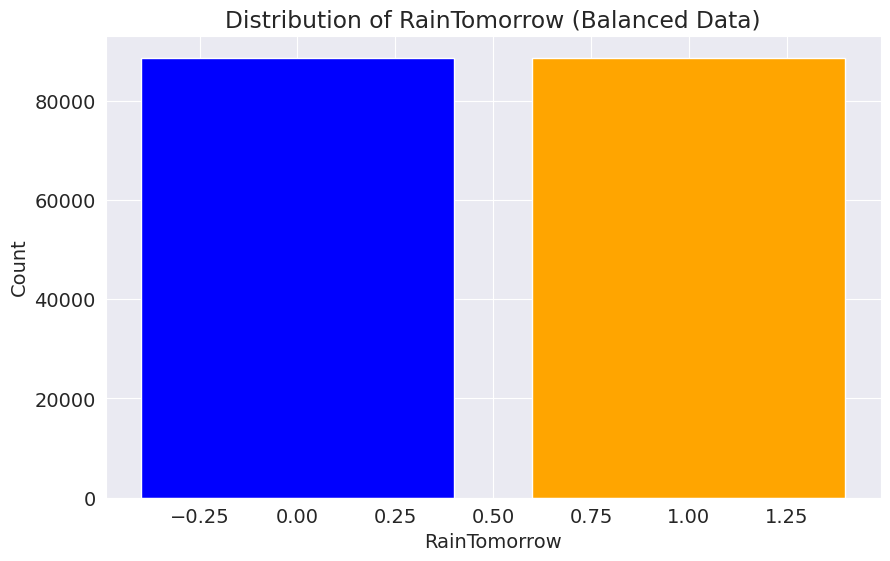

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'RainTomorrow' is the target variable
target_distribution = train_resampled_df['RainTomorrow'].value_counts()

# Plotting the distribution
plt.bar(target_distribution.index, target_distribution.values, color=['blue', 'orange'])
plt.xlabel('RainTomorrow')
plt.ylabel('Count')
plt.title('Distribution of RainTomorrow (Balanced Data)')
plt.show()


In [ ]:
# Check if a specific column is present in the DataFrame
print('Location_Albany' in train_inputs_encoded.columns)

True


In [ ]:
print(categorical_cols)
print(train_inputs_encoded.columns)


['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
Index(['Location_Albany', 'Location_Albury', 'Location_AliceSprings',
       'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo',
       'Location_Brisbane', 'Location_Cairns', 'Location_Canberra',
       'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor',
       'Location_Darwin', 'Location_GoldCoast', 'Location_Hobart',
       'Location_Katherine', 'Location_Launceston', 'Location_Melbourne',
       'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree',
       'Location_MountGambier', 'Location_MountGinini', 'Location_Newcastle',
       'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland',
       'Location_Nuriootpa', 'Location_PearceRAAF', 'Location_Penrith',
       'Location_Perth', 'Location_PerthAirport', 'Location_Portland',
       'Location_Richmond', 'Location_Sale', 'Location_SalmonGums',
       'Location_Sydney', 'Location_SydneyAirport', 'Loc

In [ ]:
# Extract numeric columns from train_inputs
numeric_cols_original = train_inputs.select_dtypes(include=['float64', 'int64']).columns

# Ensure numeric_cols_original is a subset of encoded_cols
numeric_cols_original = [col for col in numeric_cols_original if col in encoded_cols]

# Fit the model using only numeric columns
model.fit(train_inputs_encoded[numeric_cols_original + encoded_cols], train_targets)


LogisticRegression(solver='liblinear')

In [ ]:
print(numeric_cols + encoded_cols)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Location_Albany', 'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine', 'Location_Launceston', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree', 'Location_MountGambier', 'Location_MountGinini', 'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF', 'Location_Penrith', 'Location_Perth', 'Location_PerthAirport', 'Location_Portland', 'Location_Richmond', 'Location_Sale', 'Location_SalmonGums', 'Locatio

In [ ]:
print(model.coef_.tolist())

[[-0.2371837376913577, -0.1545353044810962, -0.317527017443756, -0.1705380253157126, -0.09479874292441577, -0.16592575913153063, -0.1254148118497003, 0.023764220274761372, -0.2482811932214858, -0.23457286601589897, -0.09647309936099842, -0.05814384730409876, -0.12231309668495079, -0.07318317145751951, -0.1329013434007564, -0.12783847810001378, -0.18876891752618144, -0.10847400883222547, -0.14609686890631352, -0.26165893088499753, -0.2532184974649831, -0.054957597738205875, -0.08852550697996439, -0.3327216015842585, -0.12157356414918405, -0.06382491005985952, -0.037793840141278616, -0.1608943020063634, -0.21909978260452792, -0.15521155243659546, -0.1515104306418379, -0.19056807754006028, 0.007678021452460944, -0.1876618623359007, -0.18122733584389641, -0.2211588710878898, -0.13892193276363102, -0.0877262461843907, -0.15636645808176206, -0.20871072011734554, -0.1819096680481861, -0.20589265401798912, -0.008723657176904554, -0.1054938181290656, -0.11800142889313939, -0.04682242476009789, 

In [ ]:
# Extract numeric columns from the original DataFrame
numeric_cols_original = train_inputs.select_dtypes(include=['float64', 'int64']).columns

# Ensure numeric_cols_original is a subset of encoded_cols
numeric_cols_original = [col for col in numeric_cols_original if col in encoded_cols]

# Concatenate numeric columns and one-hot encoded columns
X_train = pd.concat([train_inputs[numeric_cols_original], train_inputs_encoded[encoded_cols]], axis=1)
X_val = pd.concat([val_inputs[numeric_cols_original], val_inputs_encoded[encoded_cols]], axis=1)
X_test = pd.concat([test_inputs[numeric_cols_original], test_inputs_encoded[encoded_cols]], axis=1)


In [ ]:
train_preds = model.predict(X_train)

In [ ]:
train_preds

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [ ]:
train_targets

31        No
32        No
33        No
34        No
35        No
          ..
145279    No
145280    No
145281    No
145282    No
145283    No
Name: RainTomorrow, Length: 114254, dtype: object

In [ ]:
train_probs = model.predict_proba(X_train)
train_probs

array([[9.99761102e-01, 2.38897752e-04],
       [9.99783363e-01, 2.16637031e-04],
       [9.99737138e-01, 2.62861799e-04],
       ...,
       [9.99821904e-01, 1.78096497e-04],
       [9.99757195e-01, 2.42805221e-04],
       [9.99812826e-01, 1.87174384e-04]])

In [ ]:
# model.classes_

In [ ]:
accuracy_score(train_targets, train_preds)

1.0

In [ ]:
# confusion_matrix(train_targets, train_preds, normalize='true')

In [ ]:
def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)

    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))

    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));

    return preds

In [ ]:
def random_guess(inputs):
    return np.random.choice(["No", "Yes"], len(inputs))

In [ ]:
def all_no(inputs):
    return np.full(len(inputs), "No")

In [ ]:
accuracy_score(test_targets, random_guess(X_test))

0.4938186382177597

In [ ]:
accuracy_score(test_targets, all_no(X_test))

0.7883903357389395

In [ ]:
# def custom_train_test_split(data, val_size=0.25, test_size=0.2, random_state=None):
#     np.random.seed(random_state)
#     shuffle_indices = np.random.permutation(len(data))
#     val_end = int(len(data) * (1 - val_size))
#     test_end = int(val_end * (1 - test_size))

#     train_data = data.iloc[:test_end]
#     val_data = data.iloc[test_end:val_end]
#     test_data = data.iloc[val_end:]

#     return train_data, val_data, test_data

# # Use three variables to unpack the result
# train_df, val_df, test_df = custom_train_test_split(df, test_size=0.2, random_state=42)

# # Display the shapes
# print('train_df.shape:', train_df.shape)
# print('val_df.shape:', val_df.shape)
# print('test_df.shape:', test_df.shape)


In [ ]:
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation   Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6     3.733333  10.033333   
1  2008-12-02   Albury      7.4     25.1       0.0     6.733333  10.033333   
2  2008-12-03   Albury     12.9     25.7       0.0     5.400000  10.033333   
3  2008-12-04   Albury      9.2     28.0       0.0     9.066667  10.033333   
4  2008-12-05   Albury     17.5     32.3       1.0     4.400000  10.033333   

  WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
0           W           44.0          W        WNW          20.0   
1         WNW           44.0        NNW        WSW           4.0   
2         WSW           46.0          W        WSW          19.0   
3          NE           24.0         SE          E          11.0   
4           W           41.0        ENE         NW           7.0   

   WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0          24.0         71.0         22.0       1007.7       1007.1  8.000000   
1          22.0         44.0         25.0       1010.6       1007.8  0.666667   
2          26.0         38.0         30.0       1007.6       1008.7  0.333333   
3           9.0         45.0         16.0       1017.6       1012.8  2.333333   
4          20.0         82.0         33.0       1010.8       1006.0  7.000000   

   Cloud3pm  Temp9am  Temp3pm RainToday RainTomorrow  Year  
0  4.333333     16.9     21.8        No           No  2008  
1  0.666667     17.2     24.3        No           No  2008  
2  2.000000     21.0     23.2        No           No  2008  
3  2.666667     18.1     26.5        No           No  2008  
4  8.000000     17.8     29.7        No           No  2008

In [ ]:
df.shape

(140787, 24)

In [ ]:
# df = train_resampled_df.head(1000)

In [ ]:
X = df.drop(['RainTomorrow'],axis=1)
Y = df['RainTomorrow']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

In [ ]:
X_train.shape

(126708, 23)

In [ ]:
X_test.shape

(14079, 23)

In [ ]:
Y_train.shape

(126708,)

In [ ]:
Y_test.shape

(14079,)

In [ ]:
print(X_train.dtypes)
print(Y_train.dtypes)

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
Year               int64
dtype: object
object


In [ ]:
# X_train_encoded = pd.get_dummies(X_train)
# X_val_encoded = pd.get_dummies(X_val)

In [ ]:
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')

In [ ]:
# print(X_train_encoded.dtypes)
# print(X_val_encoded.dtypes)

In [ ]:
# import numpy as np
# import pandas as pd

# def z_score_normalization(data):
#     # Calculate mean and standard deviation for each column
#     means = np.mean(data, axis=0)
#     std_devs = np.std(data, axis=0)

#     # Z-score normalize each column
#     normalized_data = (data - means) / std_devs

#     return normalized_data

# # Assuming your data is in a DataFrame named 'df' and you want to normalize certain columns
# columns_to_normalize = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
#                          'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
#                          'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm',
#                          'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']

# # Extract the columns you want to normalize
# data_to_normalize = df[columns_to_normalize].to_numpy()

# # Perform Z-score normalization
# normalized_data = z_score_normalization(data_to_normalize)

# # Replace the original columns with normalized values
# df[columns_to_normalize] = normalized_data

# # Now, 'df' contains Z-score normalized values for the specified columns


In [ ]:
print(encoded_cols)
print(val_inputs.columns)


['Location_Albany', 'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine', 'Location_Launceston', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree', 'Location_MountGambier', 'Location_MountGinini', 'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF', 'Location_Penrith', 'Location_Perth', 'Location_PerthAirport', 'Location_Portland', 'Location_Richmond', 'Location_Sale', 'Location_SalmonGums', 'Location_Sydney', 'Location_SydneyAirport', 'Location_Townsville', 'Location_Tuggeranong', 'Location_Uluru', 'Location_WaggaWagga', 'Location_Walpole', 'Location_Watsonia', 'Location_Williamtown', 'Location_Witchcliffe', 'L

In [ ]:
# Extract numeric columns from the original DataFrame
numeric_cols_original = train_inputs.select_dtypes(include=['float64', 'int64']).columns

# Ensure numeric_cols_original is a subset of encoded_cols
numeric_cols_original = [col for col in numeric_cols_original if col in encoded_cols]

# Concatenate numeric columns and one-hot encoded columns for training set
X_train = pd.concat([train_inputs[numeric_cols_original], train_inputs_encoded[encoded_cols]], axis=1)

# Concatenate numeric columns and one-hot encoded columns for validation set
X_val = pd.concat([val_inputs[numeric_cols_original], val_inputs_encoded[encoded_cols]], axis=1)

# Concatenate numeric columns and one-hot encoded columns for test set
X_test = pd.concat([test_inputs[numeric_cols_original], test_inputs_encoded[encoded_cols]], axis=1)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function to add a bias term (column of 1s) to the feature matrix
def add_bias_term(X):
    return np.c_[np.ones(X.shape[0]), X]

# Sigmoid activation function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Cost function for logistic regression
def cost_function(X, y, weights):
    m = len(y)
    predictions = sigmoid(np.dot(X, weights))
    cost = (-1/m) * np.sum(y * np.log(predictions) + (1-y) * np.log(1-predictions))
    return cost

# Gradient descent for logistic regression
def gradient_descent(X, y, weights, learning_rate, iterations):
    m = len(y)
    costs = []
    for _ in range(iterations):
        predictions = sigmoid(np.dot(X, weights))
        gradient = np.dot(X.T, (predictions - y)) / m
        weights -= learning_rate * gradient
        cost = cost_function(X, y, weights)
        costs.append(cost)
    return weights, costs

# Predict function
def predict(X, weights):
    predictions = sigmoid(np.dot(X, weights))
    return [1 if p >= 0.5 else 0 for p in predictions]

# Assuming 'Yes' is the positive class and 'No' is the negative class
y_train_labels = train_targets.replace({'Yes': 1, 'No': 0}).values

# Training set
X_train = add_bias_term(train_inputs_encoded[encoded_cols].values)
y_train = y_train_labels

# Ensure encoded_cols is a subset of columns in val_inputs
encoded_cols = [col for col in encoded_cols if col in val_inputs.columns]

# Validation set
X_val = add_bias_term(val_inputs[encoded_cols].values)
y_val = val_targets.values

# Initialize weights
initial_weights = np.zeros(X_train.shape[1])

# Set hyperparameters
learning_rate = 0.01
iterations = 1000

# Train the model
trained_weights, costs = gradient_descent(X_train, y_train, initial_weights, learning_rate, iterations)

# # Plot the cost over iterations to check for convergence
# plt.plot(costs)
# plt.xlabel('Iterations')
# plt.ylabel('Cost')
# plt.title('Cost over Iterations')
# plt.show()

# # Validate the model
# val_predictions = predict(X_val, trained_weights.reshape(-1, 1))  # Reshape to (96, 1)
# val_accuracy = np.mean(val_predictions == y_val)
# print(f"Validation Accuracy: {val_accuracy}")

# # Test set
# X_test = add_bias_term(test_inputs[encoded_cols].values)
# y_test = test_targets.values

# # Make predictions on the test set
# test_predictions = predict(X_test, trained_weights)

# # Now 'test_predictions' contains the predicted values for RainTomorrow in your test set
# # Calculate accuracy on the test set
# test_accuracy = np.mean(test_predictions == y_test)
# print(f"Test Accuracy: {test_accuracy}")


In [ ]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt

# # Function to add a bias term (column of 1s) to the feature matrix
# def add_bias_term(X):
#     return np.c_[np.ones(X.shape[0]), X]

# # Sigmoid activation function
# def sigmoid(z):
#     return 1 / (1 + np.exp(-z))

# # Cost function for logistic regression
# def cost_function(X, y, weights):
#     m = len(y)
#     predictions = sigmoid(np.dot(X, weights))
#     cost = (-1/m) * np.sum(y * np.log(predictions) + (1-y) * np.log(1-predictions))
#     return cost

# # Gradient descent for logistic regression
# def gradient_descent(X, y, weights, learning_rate, iterations):
#     m = len(y)
#     costs = []
#     for _ in range(iterations):
#         predictions = sigmoid(np.dot(X, weights))
#         gradient = np.dot(X.T, (predictions - y)) / m
#         weights -= learning_rate * gradient
#         cost = cost_function(X, y, weights)
#         costs.append(cost)
#     return weights, costs

# # Predict function
# def predict(X, weights):
#     predictions = sigmoid(np.dot(X, weights))
#     return [1 if p >= 0.5 else 0 for p in predictions]

# # Assuming 'Yes' is the positive class and 'No' is the negative class
# y_train_labels = train_targets.replace({'Yes': 1, 'No': 0}).values

# # Training set
# X_train_resampled = add_bias_term(train_inputs_encoded[encoded_cols].values)
# y_train = y_train_labels

# # Ensure encoded_cols is a subset of columns in val_inputs
# encoded_cols = [col for col in encoded_cols if col in val_inputs.columns]

# # Validation set
# X_val = add_bias_term(val_inputs[encoded_cols].values)
# y_val = val_targets.values

# # Initialize weights
# initial_weights = np.zeros(X_train.shape[1])

# # Set hyperparameters
# learning_rate = 0.01
# iterations = 1000

# # Train the model
# trained_weights, costs = gradient_descent(X_train_resampled, y_train_labels, initial_weights, learning_rate, iterations)

# # # Plot the cost over iterations to check for convergence
# # plt.plot(costs)
# # plt.xlabel('Iterations')
# # plt.ylabel('Cost')
# # plt.title('Cost over Iterations')
# # plt.show()

# # # Validate the model
# # val_predictions = predict(X_val, trained_weights.reshape(-1, 1))  # Reshape to (96, 1)
# # val_accuracy = np.mean(val_predictions == y_val)
# # print(f"Validation Accuracy: {val_accuracy}")

# # # Test set
# # X_test = add_bias_term(test_inputs[encoded_cols].values)
# # y_test = test_targets.values

# # # Make predictions on the test set
# # test_predictions = predict(X_test, trained_weights)

# # # Now 'test_predictions' contains the predicted values for RainTomorrow in your test set
# # # Calculate accuracy on the test set
# # test_accuracy = np.mean(test_predictions == y_test)
# # print(f"Test Accuracy: {test_accuracy}")


In [ ]:
# # Assuming 'Yes' is the positive class and 'No' is the negative class
# y_train_labels = train_targets.replace({'Yes': 1, 'No': 0}).values

# # Training set
# X_train = add_bias_term(train_inputs_encoded[encoded_cols].values)
# y_train = y_train_labels

# # Validation set
# y_val_labels = val_targets.replace({'Yes': 1, 'No': 0}).values
# X_val = add_bias_term(val_inputs[encoded_cols].values)
# y_val = y_val_labels

# # Initialize weights
# initial_weights = np.zeros(X_train.shape[1])

# # Set hyperparameters
# learning_rate = 0.01
# iterations = 1000

# # Train the model
# trained_weights, costs = gradient_descent(X_train_resampled, y_train_labels, initial_weights, learning_rate, iterations)

# # Plot the cost over iterations to check for convergence
# plt.plot(costs)
# plt.xlabel('Iterations')
# plt.ylabel('Cost')
# plt.title('Cost over Iterations')
# plt.show()

# # Validate the model
# val_predictions = predict(X_val, trained_weights)
# val_accuracy = np.mean(val_predictions == y_val)
# print(f"Validation Accuracy: {val_accuracy}")

# # Test set
# X_test = add_bias_term(test_inputs[encoded_cols].values)
# y_test_labels = test_targets.replace({'Yes': 1, 'No': 0}).values
# y_test = y_test_labels

# # Make predictions on the test set
# test_predictions = predict(X_test, trained_weights)

# # Calculate accuracy on the test set
# test_accuracy = np.mean(test_predictions == y_test)
# print(f"Test Accuracy: {test_accuracy}")


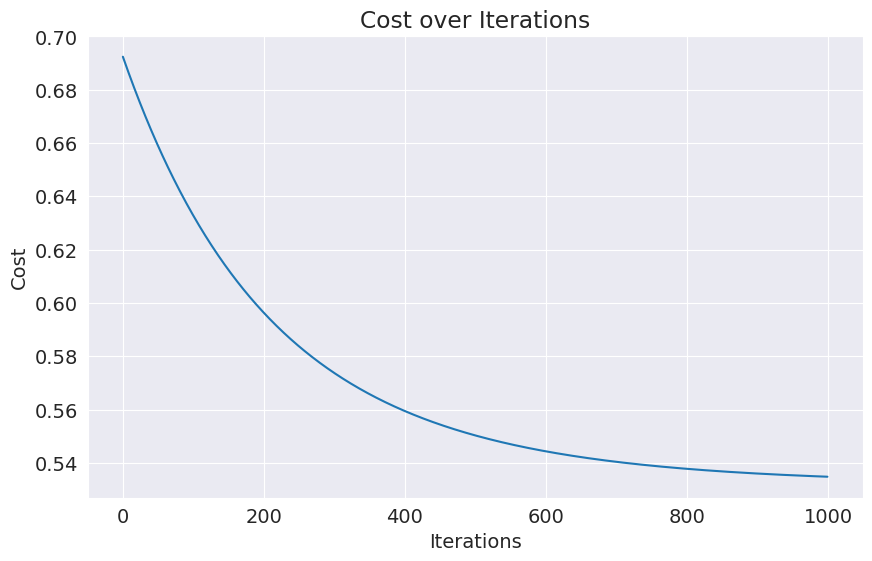

Validation Accuracy: 0.7908095867144744
Test Accuracy: 0.7883903357389395


In [ ]:
# Assuming 'Yes' is the positive class and 'No' is the negative class
y_train_labels = train_targets.replace({'Yes': 1, 'No': 0}).values

# Training set
X_train = add_bias_term(train_inputs_encoded[encoded_cols].values)
y_train = y_train_labels

# Validation set
y_val_labels = val_targets.replace({'Yes': 1, 'No': 0}).values
X_val = add_bias_term(val_inputs[encoded_cols].values)
y_val = y_val_labels

# Initialize weights
initial_weights = np.zeros(X_train.shape[1])

# Set hyperparameters
learning_rate = 0.01
iterations = 1000

# Train the model
trained_weights, costs = gradient_descent(X_train, y_train, initial_weights, learning_rate, iterations)

# Plot the cost over iterations to check for convergence
plt.plot(costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost over Iterations')
plt.show()

# Validate the model
val_predictions = predict(X_val, trained_weights)
val_accuracy = np.mean(val_predictions == y_val)
print(f"Validation Accuracy: {val_accuracy}")

# Test set
X_test = add_bias_term(test_inputs[encoded_cols].values)
y_test_labels = test_targets.replace({'Yes': 1, 'No': 0}).values
y_test = y_test_labels

# Make predictions on the test set
test_predictions = predict(X_test, trained_weights)

# Calculate accuracy on the test set
test_accuracy = np.mean(test_predictions == y_test)
print(f"Test Accuracy: {test_accuracy}")


In [ ]:
# Convert target variable to numeric values
train_targets = train_targets.map({'No': 0, 'Yes': 1})
val_targets = val_targets.map({'No': 0, 'Yes': 1})
test_targets = test_targets.map({'No': 0, 'Yes': 1})

# Train the model
trained_weights, costs = gradient_descent(X_train, y_train_labels, initial_weights, learning_rate, iterations)


In [ ]:
from sklearn.metrics import confusion_matrix
test_conf_matrix = confusion_matrix(y_test_labels, test_predictions)
print("Test Confusion Matrix:")
print(test_conf_matrix)

Test Confusion Matrix:
[[12563     0]
 [ 3372     0]]


In [ ]:
# Check the columns in your DataFrame
print(train_df.columns)


Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Year'],
      dtype='object')


Data cleaning KNN,
proper reason core,
data split acc to the year,
